In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
sns.set(font_scale=1.5)

**************************************************

Parcel workplace param sweep

**************************************************

Get variables

In [2]:
df = pd.read_pickle('param_sweep.pkl',compression='bz2')
df['NRecovered'] = df['FracRecovered']*df['NStaff']

In [3]:
print(len(df))
NDteams = np.unique(df["NDteams"])
NLteams = np.unique(df["NLteams"])
NOteams = np.unique(df["NOteams"])
Phi = np.unique(df["phi"])
II = np.unique(df["InfInit"])
#parameter reminder
print("Td = ", np.unique(df["tD"]))
print('Pisol = ', np.unique(df['Pisol']))
print('Random contact rate = ', np.unique(df['p_contact']))
print('Staff totals = ', np.unique(df['NStaff']))

10800000
Td =  [0.05]
Pisol =  [0.5]
Random contact rate =  [0.02941176]
Staff totals =  [10 20 38 68]


In [6]:
job = ['Driver','Picker','Office']
dfall = df[df["Group"]=='All']
dfall['outbreak'] = (dfall['NRecovered'] > 4)
dfall['Ninfected'] = (dfall.loc[:,'FracRecovered']*dfall.loc[:,'NStaff'] - 1)
dfall['InfJob'] = np.ones(len(dfall),dtype=np.object)
for i in np.arange(3):
    dfall.loc[dfall['InfInit']==i+1,'InfJob'] = job[i]
dfNDT = dfall[(dfall['NLteams'] == 2) & (dfall['NOteams'] == 2)] 
dfNLT = dfall[(dfall['NDteams'] == 3) & (dfall['NOteams'] == 2)] 
dfNOT = dfall[(dfall['NDteams'] == 3) & (dfall['NLteams'] == 2)]

/Users/carlwhitfield/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/carlwhitfield/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/carlwhitfield/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is tr

Index case to outbreak relation

In [11]:
sp = sns.catplot(x='phi',y='outbreak', hue='NDteams',col='InfInit',data=dfNDT,kind='point',\
                 markers=["s","o","^","x"], linestyles=["-", "--",":","-."], legend=False)
sp.set(xlabel='Mixing rate',ylim=(0,0.5))
axes = sp.axes.flatten()
axes[0].set_ylabel('Outbreak probability')
lab = ['a','b','c']
for i in range(3):
    axes[i].set_title('(%s) Index Case = %s'%(lab[i],job[i]))
sp.set_xticklabels(rotation=90)
plt.legend(loc='lower right',title='Driver teams')
plt.tight_layout()
sp.savefig('param_sweep_outbreak_probability_NDT.png')

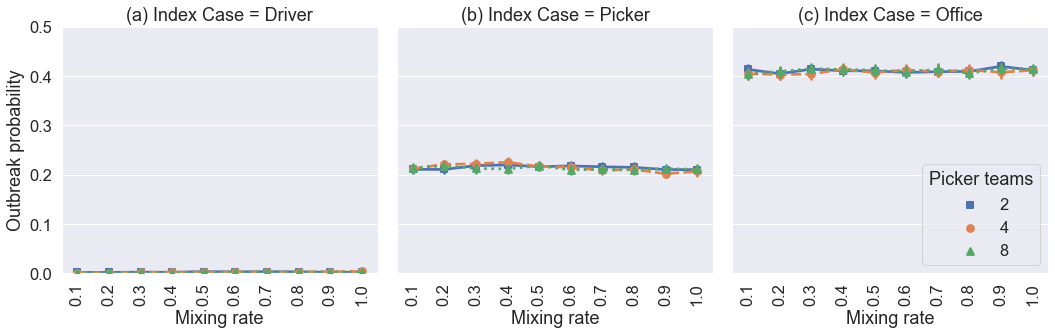

In [15]:
sp = sns.catplot(x='phi',y='outbreak', hue='NLteams',col='InfInit',data=dfNLT,kind='point',\
                 markers=["s","o","^","x"], linestyles=["-", "--",":","-."], legend=False)
sp.set(xlabel='Mixing rate',ylim=(0,0.5))
axes = sp.axes.flatten()
axes[0].set_ylabel('Outbreak probability')
lab = ['a','b','c']
for i in range(3):
    axes[i].set_title('(%s) Index Case = %s'%(lab[i],job[i]))
sp.set_xticklabels(rotation=90)
plt.legend(loc='lower right',title='Picker teams')
plt.tight_layout()
sp.savefig('param_sweep_outbreak_probability_NLT.png')

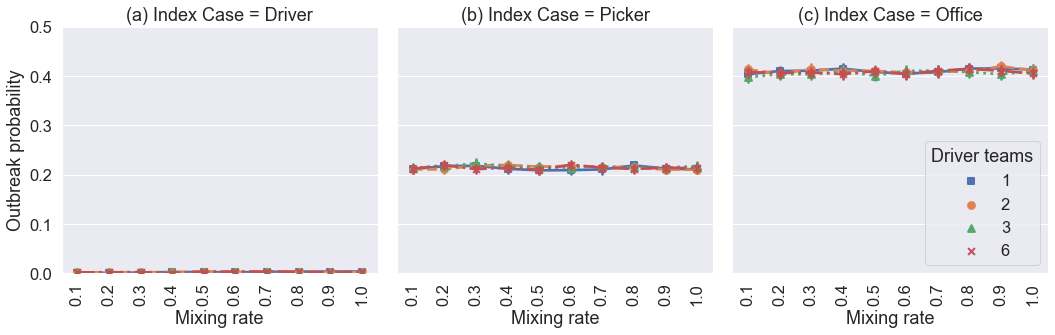

In [16]:
sp = sns.catplot(x='phi',y='outbreak', hue='NOteams',col='InfInit',data=dfNOT,kind='point',\
                 markers=["s","o","^","x"], linestyles=["-", "--",":","-."], legend=False)
sp.set(xlabel='Mixing rate',ylim=(0,0.5))
axes = sp.axes.flatten()
axes[0].set_ylabel('Outbreak probability')
lab = ['a','b','c']
for i in range(3):
    axes[i].set_title('(%s) Index Case = %s'%(lab[i],job[i]))
sp.set_xticklabels(rotation=90)
plt.legend(loc='lower right',title='Office teams')
plt.tight_layout()
sp.savefig('param_sweep_outbreak_probability_NOT.png')

/Users/carlwhitfield/opt/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


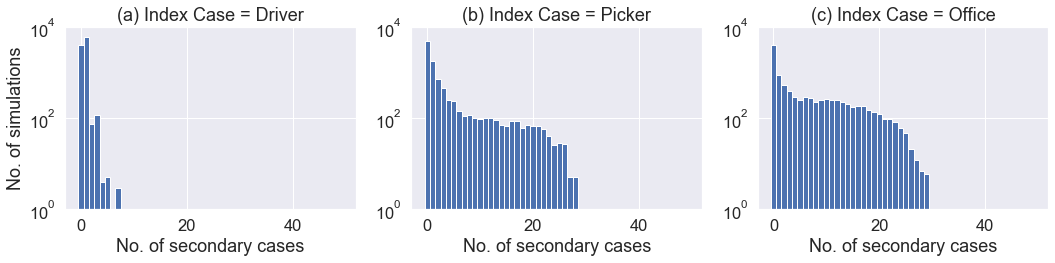

In [17]:
fig, ax = plt.subplots(1,3,figsize=(15,4))
ntd = 2
nphi = 0
for (i,ii) in enumerate(II):
    dfh = dfall[(dfall['InfInit'] == ii)*(dfall['NDteams']==3)*(dfall['NLteams']==2)*(dfall['NOteams']==2)*(dfall['phi']==Phi[nphi])]
    ax[i].hist(dfh['Ninfected'],bins=(np.arange(51)-0.5),label='%.2f'%Phi[nphi])
    ax[i].set_yscale('log')
    ax[i].set_ylim((1,10000))
    ax[i].set_title('(%s) Index Case = %s'%(lab[i],job[i]))
    ax[i].set_xlabel('No. of secondary cases')
ax[0].set_ylabel('No. of simulations')
fig.tight_layout()
fig.savefig('secondary_cases_hist.png')

Count customer infections

In [ ]:
dfh = df[lambda df: (df['phi'] == Phi[0]) | (df['phi'] == Phi[2]) | (df['phi'] == Phi[4])]

sp = sns.catplot(x='tD',y='CustomersInfectedByDrivers',col='InfInit',hue='phi',data=dfh,\
                 markers=["s","o","^"],linestyles=["-", "--",":"], kind='point',legend=False)
sp.set(ylim=(0,3.0),xlabel='Driver contact rate')
axes = sp.axes.flatten()
axes[0].set_ylabel('Customers infected per simulation')
lab = ['a','b','c']
for i in range(3):
    axes[i].set_title('(%s) Index Case = %s'%(lab[i],job[i]))
plt.legend(loc='upper left',title='Mixing param')
sp.set_xticklabels(rotation=90)
sp.savefig('Customer_infections.png')

Only weak dependence on phi, and only for small phi. Might be worth showing how NN contacts for each group varies with phi and workplace size

In [31]:
#breakdown of infection causes in the model
jobtypes = np.unique(df['Group'])
print(jobtypes)
netinfs = np.zeros((len(jobtypes),len(Phi),len(II)))
continfs = np.zeros((len(jobtypes),len(Phi),len(II)))
roominfs = np.zeros((len(jobtypes),len(Phi),len(II)))
carinfs = np.zeros((len(jobtypes),len(Phi),len(II)))
houseinfs = np.zeros((len(jobtypes),len(Phi),len(II)))
dfh = df.loc[lambda df: (df['NDteams']==3)*(df['NLteams']==2)*(df['NOteams']==2)]
for (n, g) in enumerate(jobtypes):
    dfg = dfh.loc[lambda dfh: (dfh['Group'] == g)]
    for (j,phi) in enumerate(Phi):
        dfij =  dfg.loc[lambda dfg: (dfg['phi'] == phi)]
        for (k,ii) in enumerate(II):
            dfijk =  dfij.loc[lambda dfij: (dfij['InfInit'] == ii)]

            netinfs[n,j,k] = np.mean(dfijk['CohortInfectionFrac']*dfijk['NStaff'])
            continfs[n,j,k] = np.mean(dfijk['RandContactInfectionFrac']*dfijk['NStaff'])
            roominfs[n,j,k] = np.mean(dfijk['RoomInfectionFrac']*dfijk['NStaff'])
            carinfs[n,j,k] = np.mean(dfijk['CarShareInfFrac']*dfijk['NStaff'])
            houseinfs[n,j,k] = np.mean(dfijk['HouseShareInfFrac']*dfijk['NStaff'])
# for (i,td) in enumerate(TD):
#     for (j,phi) in enumerate(Phi):
#         for (k,ii) in enumerate(II):
#             norm = netinfs[jobtypes=='All',i,j,k][0] + \
#                    continfs[jobtypes=='All',i,j,k][0] + \
#                    roominfs[jobtypes=='All',i,j,k][0]
#             if norm > 0:
#                 for (n, g) in enumerate(jobtypes): 
#                     netinfs[n,i,j,k] /= norm
#                     continfs[n,i,j,k] /= norm
#                     roominfs[n,i,j,k] /= norm

In [40]:
np.max(houseinfs)

0.0

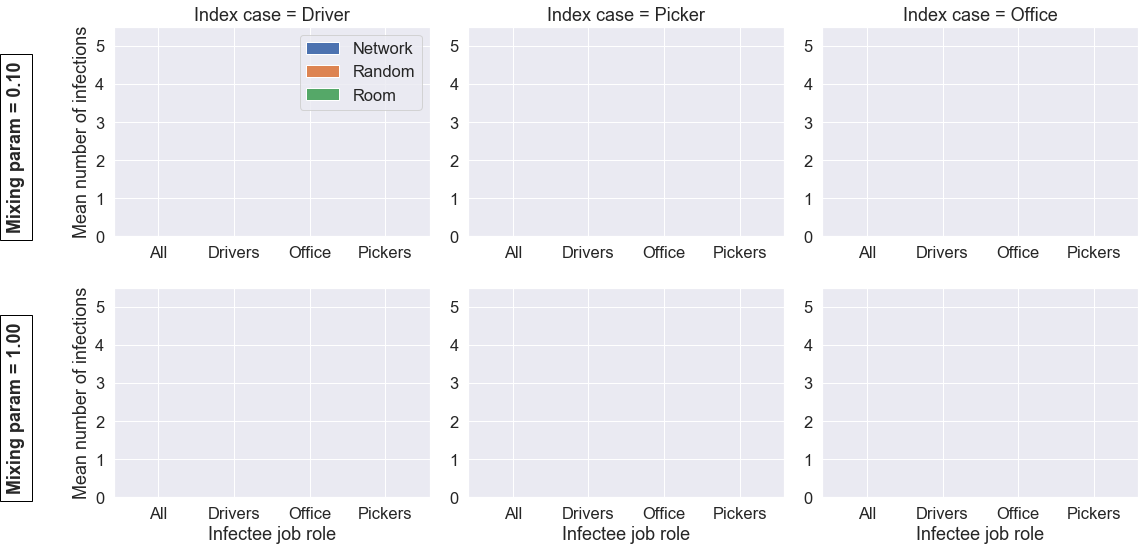

In [33]:
fig,ax = plt.subplots(2,3,figsize=(16,8))                
for k in np.arange(3):
    ax[1,k].bar(jobtypes, houseinfs[:,len(Phi)-1,k] + \
                          carinfs[:,len(Phi)-1,k] + \
                          netinfs[:,len(Phi)-1,k] + \
                          continfs[:,len(Phi)-1,k] + \
                          roominfs[:,len(Phi)-1,k],label='House')
    ax[1,k].bar(jobtypes, carinfs[:,len(Phi)-1,k] + \
                          netinfs[:,len(Phi)-1,k] + \
                          continfs[:,len(Phi)-1,k] + \
                          roominfs[:,len(Phi)-1,k],label='Car')
    
    ax[1,k].bar(jobtypes, netinfs[:,len(Phi)-1,k] + \
                          continfs[:,len(Phi)-1,k] + \
                          roominfs[:,len(Phi)-1,k],label='Cohort')
    ax[1,k].bar(jobtypes, continfs[:,len(Phi)-1,k] + \
                          roominfs[:,len(Phi)-1,k],label='Random')
    ax[1,k].bar(jobtypes, roominfs[:,len(Phi)-1,k],label='Room')

    ax[0,k].bar(jobtypes, netinfs[:,0,k] + continfs[:,0,k] + \
                          roominfs[:,0,k],label='Network')
    ax[0,k].bar(jobtypes, continfs[:,0,k] + roominfs[:,0,k],label='Random')
    ax[0,k].bar(jobtypes, roominfs[:,0,k],label='Room')
    
    ax[0,k].set_title('Index case = %s'%job[k])
    ax[0,k].set_ylim((0,5.5))
    ax[1,k].set_ylim((0,5.5))
    ax[1,k].set_xlabel('Infectee job role')
ax[0,0].text(-2.0, 0.2, 'Mixing param = %.2f'%Phi[0], rotation='vertical',fontweight='bold',\
            bbox={'facecolor': 'white', 'alpha': 1.0, 'pad': 7.0, 'linestyle': '-',\
                  'edgecolor': 'black'})
ax[1,0].text(-2.0, 0.2, 'Mixing param = %.2f'%Phi[len(Phi)-1], rotation='vertical',fontweight='bold',
             bbox={'facecolor': 'white', 'alpha': 1.0, 'pad': 7.0, 'linestyle': '-',\
                   'edgecolor': 'black'})
ax[0,0].set_ylabel('Mean number of infections')
ax[1,0].set_ylabel('Mean number of infections')
ax[0,0].legend()
fig.tight_layout()
fig.savefig('infection_routes.png')
####need to extract for tD = 0.25, like the rest

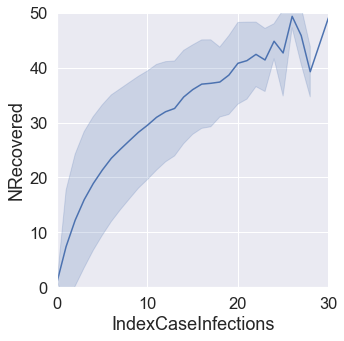

In [15]:
extreme_cases_df = df.loc[lambda df: (df['Group']=='All') & (df['FracRecovered']>10/df['NStaff'])]
#plt.hist(extreme_cases_df['FracRecovered'],bins=20)
figh = sns.relplot(x='IndexCaseInfections',y='NRecovered',data=df.loc[lambda df: (df['Group']=='All')],\
                   kind='line',ci='sd')
figh.set(xlim=(0,30),ylim=(0,50))

In [16]:
job_roles = ['Drivers','Pickers','Office']
phisel = [0.05,1.0]

second_infs_mean = np.zeros((len(job_roles),len(TD),len(phisel),len(II)))
second_infs_std = np.zeros((len(job_roles),len(TD),len(phisel),len(II))) 
for i in np.arange(len(job_roles)):
    dfi = df.loc[lambda df: (df['Group'] == job_roles[i])]
    for j in np.arange(len(TD)):
        dfij = dfi.loc[lambda df: (df['tD'] == TD[j])]
        for k in np.arange(len(phisel)):
            dfijk = dfij.loc[lambda df: (df['phi'] == phisel[k])]
            for n in np.arange(len(II)):
                dfh = dfijk.loc[lambda df: (df['InfInit'] == II[n])]
                if i == n:
                    second_infs_mean[i,j,k,n] = np.mean(dfh['NRecovered']-1)
                    second_infs_std[i,j,k,n] = np.std(dfh['NRecovered']-1)
                else:
                    second_infs_mean[i,j,k,n] = np.mean(dfh['NRecovered'])
                    second_infs_std[i,j,k,n] = np.std(dfh['NRecovered'])

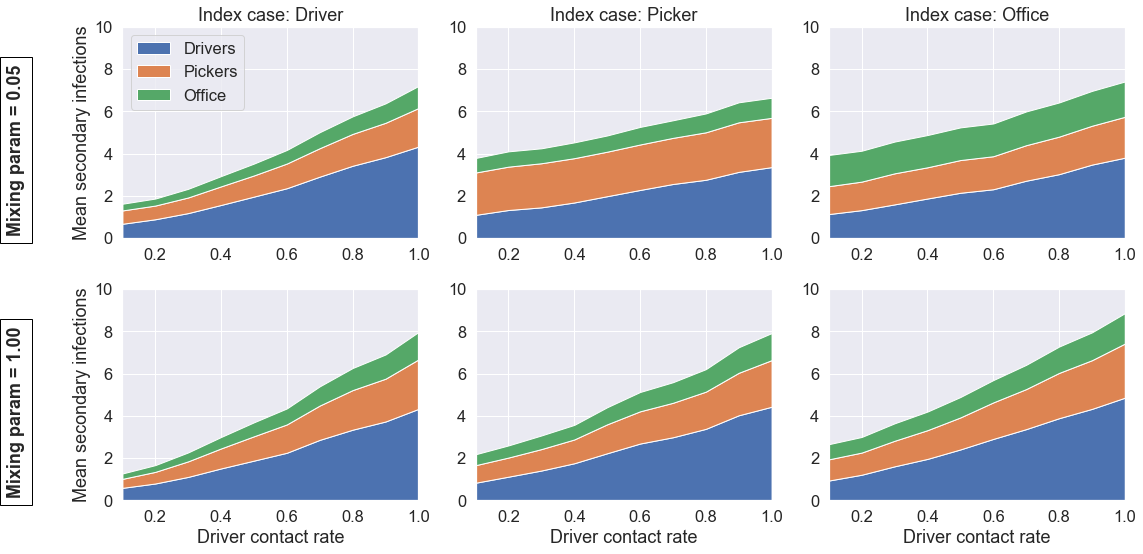

In [19]:
fig, ax = plt.subplots(2,3,figsize=(16,8))

for k in np.arange(len(phisel)):  #row
    for n in np.arange(len(II)):  #col
        ax[k,n].stackplot(TD,[second_infs_mean[0,:,k,n],second_infs_mean[1,:,k,n],\
                                second_infs_mean[2,:,k,n]],labels=job_roles)
        ax[k,n].set_xlim((0.1,1))
        ax[k,n].set_ylim((0,10.0))
        #for i in np.arange(len(job_roles)):
        #ax[k,n].errorbar(TD,np.sum(second_infs_mean[0:i,:,k,n],0),second_infs_std[i,:,k,n])
        ax[1,n].set_xlabel('Driver contact rate')
        ax[0,n].set_title('Index case: %s'%job[n])
    ax[k,0].set_ylabel('Mean secondary infections')
    ax[k,0].text(-0.25, 0.3, 'Mixing param = %.2f'%phisel[k], rotation='vertical',fontweight='bold',
                 bbox={'facecolor': 'white', 'alpha': 1.0, 'pad': 7.0, 'linestyle': '-',\
                       'edgecolor': 'black'})
ax[0,0].legend(loc='upper left')

fig.tight_layout(pad=1)
fig.savefig('secondary_cases_cumulative.png')

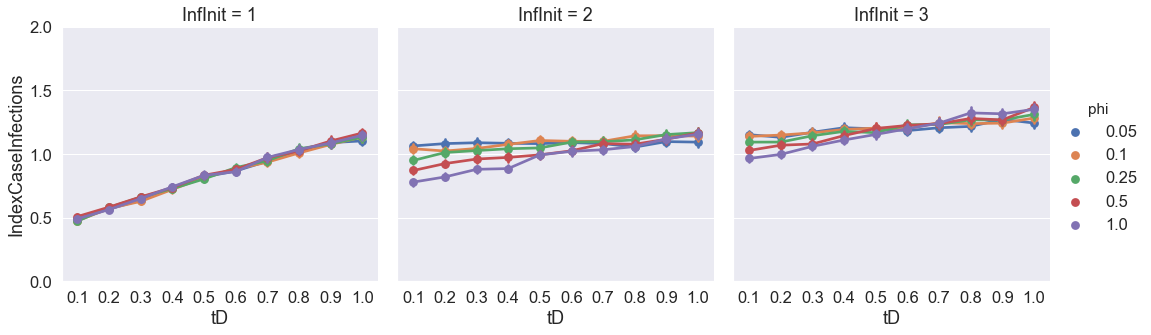

In [25]:
extreme_cases_df = dfall.loc[lambda df: (df['FracRecovered']>10/df['NStaff'])]
#plt.hist(extreme_cases_df['FracRecovered'],bins=20)
figh = sns.catplot(x='tD',y='IndexCaseInfections',col='InfInit',hue='phi',data=dfall,\
                   kind='point')
figh.set(ylim=(0,2))

count customers infected